<a href="https://colab.research.google.com/github/icecream126/CVML_ML_Study/blob/main/2021_07_31/Hyeseong/Probabiltiy_Expectation%26Distribution_Distance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

$X$ ~ $N(0, 1)$ \\
$Y$ ~ $N(0, 2)$

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt

# 1. Plot

$E(X)$, $E(Y)$, $E(XY)$, $||X-Y||_{\alpha p}, where \ 1 \leq p \leq 10$

## Using torch.randn

In [ ]:
X = torch.randn((1000, ))
Y = torch.randn((1000, ))*(2**2)

In [ ]:
print("E(X): ", torch.mean(X))
print("E(Y): ", torch.mean(Y))
print("E(XY): ", torch.mean(X*Y))

E(X):  tensor(0.0022)
E(Y):  tensor(0.1062)
E(XY):  tensor(-0.2147)


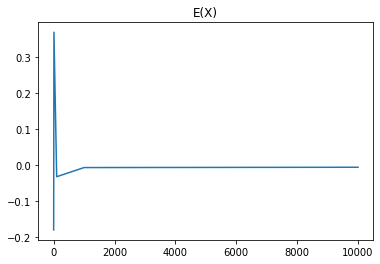

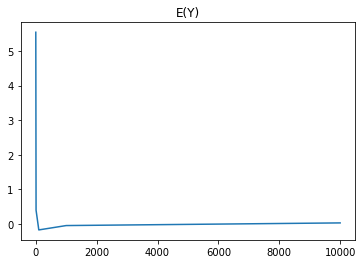

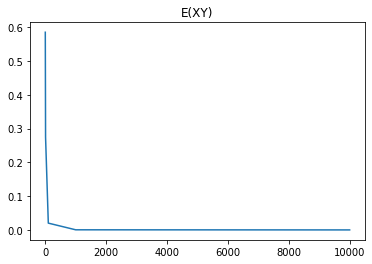

In [ ]:
x = [10**i for i in range(5)]
y = [torch.mean(torch.randn((i, ))) for i in x]
plt.plot(x, y)
plt.title("E(X)")
plt.show()

y = [torch.mean(torch.randn((i, ))*(2**2)) for i in x]
plt.plot(x, y)
plt.title("E(Y)")
plt.show()

y = [torch.mean(torch.randn((i, )))*torch.mean(torch.randn((i, ))*(2**2)) for i in x]
plt.plot(x, y)
plt.title("E(XY)")
plt.show()

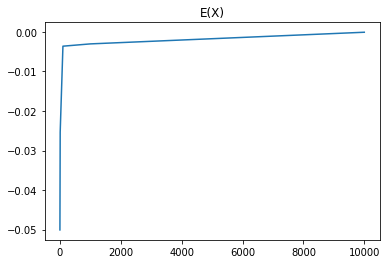

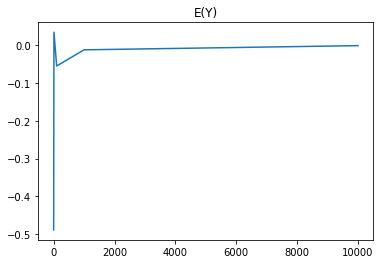

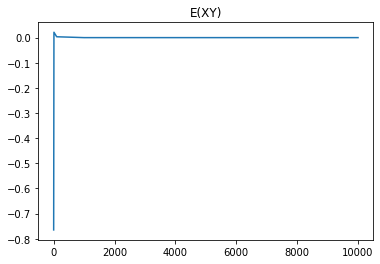

In [ ]:
x = [10**i for i in range(5)]
y = [torch.mean(torch.randn((100, i))) for i in x]
plt.plot(x, y)
plt.title("E(X)")
plt.show()

y = [torch.mean(torch.randn((100, i))*(2**2)) for i in x]
plt.plot(x, y)
plt.title("E(Y)")
plt.show()

y = [torch.mean(torch.randn((100, i)))*torch.mean(torch.randn((i, ))*(2**2)) for i in x]
plt.plot(x, y)
plt.title("E(XY)")
plt.show()

Convergence to 0.

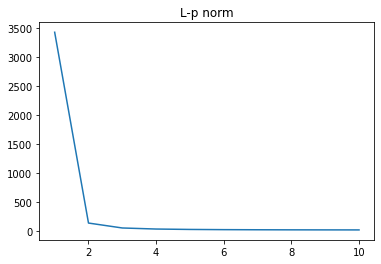

In [ ]:
x = [i+1 for i in range(10)]
y = [torch.norm((X-Y), i) for i in x]
plt.plot(x, y)
plt.title("L-p norm")
plt.show()

Convergence to 0 at $p\geq 2$.

# 2. Learning NN

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
X = torch.randn((10000, 3))*2
Y = (torch.randn(10000, 3)*2+1)+(torch.randn(10000, 3)*3+2)
target = torch.randint(0, 5, (10000, 1), dtype=torch.float32).to(device)
X = X.to(device)
Y = Y.to(device)

In [ ]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.fc1 = nn.Linear(3, 4)
        self.fc2 = nn.Linear(4, 4)
        self.fc3 = nn.Linear(4, 2)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [ ]:
model = Model().to(device)

In [ ]:
optimizer = optim.SGD(model.parameters(), lr = 0.01)

In [ ]:
num_epoch=300
losses = []

for epoch in range(num_epoch):
    model.train()

    optimizer.zero_grad()

    output_X = model(X).to(device)
    output_Y = model(Y).to(device)

    loss = F.mse_loss(torch.abs(output_X.mean()-output_Y.mean()), target)
    loss.backward()
    optimizer.step()

    print(f"[{epoch}/{num_epoch}] loss: {loss.item()}")

    losses.append(loss.item())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: Using a target size (torch.Size([10000, 1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  if sys.path[0] == '':


[0/300] loss: 2.002311944961548
[1/300] loss: 2.0022780895233154
[2/300] loss: 2.002263069152832
[3/300] loss: 2.002256155014038
[4/300] loss: 2.002253532409668
[5/300] loss: 2.0022521018981934
[6/300] loss: 2.002251625061035
[7/300] loss: 2.002251148223877
[8/300] loss: 2.002251148223877
[9/300] loss: 2.002251148223877
[10/300] loss: 2.002251386642456
[11/300] loss: 2.002251148223877
[12/300] loss: 2.002251148223877
[13/300] loss: 2.002251148223877
[14/300] loss: 2.002251148223877
[15/300] loss: 2.002251148223877
[16/300] loss: 2.002251386642456
[17/300] loss: 2.002251148223877
[18/300] loss: 2.002251148223877
[19/300] loss: 2.002251148223877
[20/300] loss: 2.002251148223877
[21/300] loss: 2.002251148223877
[22/300] loss: 2.002251148223877
[23/300] loss: 2.002251148223877
[24/300] loss: 2.002251148223877
[25/300] loss: 2.002251148223877
[26/300] loss: 2.002251148223877
[27/300] loss: 2.002251148223877
[28/300] loss: 2.002251148223877
[29/300] loss: 2.002251148223877
[30/300] loss: 2.0

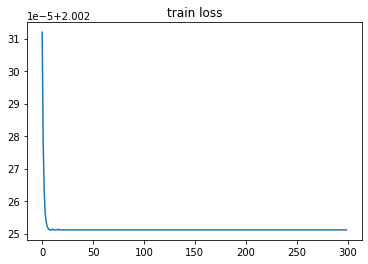

In [ ]:
plt.plot(losses);
plt.title("train loss");